<a href="https://colab.research.google.com/github/harshadaborkar/hello/blob/master/01_09_M_L_LOGISTIC_REGRESSION_(CLEANING%2C_TRAINING_AND_BUILDING_TITANIC_DATASET).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# In Titanic dataset, we found that there is some missing data, we have to clean the data to study ML algorithms
# (i.e. to transform the data into an acceptable form) 

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv('/content/drive/My Drive/titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# FIRST STEP OF CLEANING DATA IS DEALING WITH MISSING VALUES

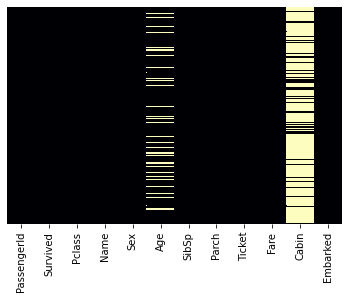

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='magma') #to find where we missing the data

In [ ]:
# Here we want to fill in missing data for the Age column instead of just dropping all the Age data rows.
# One way to do this is by filling in the mean(average) age of all the passengers this is known as Imputation.
# We'll plot boxplot 

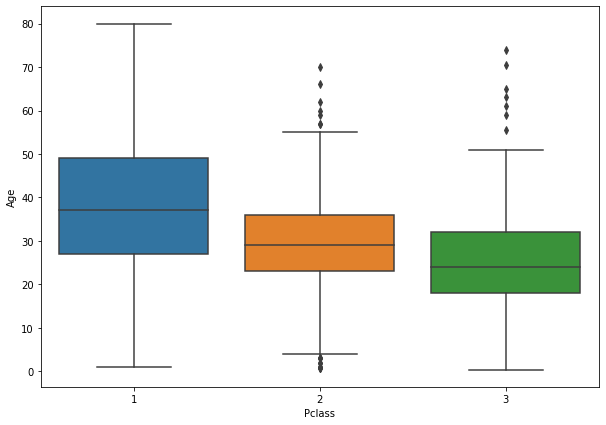

In [ ]:
plt.figure(figsize=(10,7))#for larger plot
sns.boxplot(x='Pclass',y='Age',data=train)

In [ ]:
# We can see here the wealthier passengers in the first class and second class tend to actually a bit older than passengers in the 
# third class. We can interprete this as 'If you have enough time to accumulate enough wealth you will be older and more likely to 
# be in the first class. We can use this average age values in order to input the age based off of the past year class. We could create 
# an entire model to try to predict age based off of all the features. We will use the sort of simple imputation which is little 
# better than just imputing the average age. In by imputation just by filling in.


In [ ]:
def impute_age(cols):      # created a function here that takes an argument cols
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37 #From above plot average of class 1 is 37
        elif Pclass ==2:
            return 29 #From above plot average of class 2 is 29
        else:
             return 24  #From above plot average of class 3 is 24
    else:
         return Age


In [ ]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)


In [ ]:
# Now will check the heatmap again

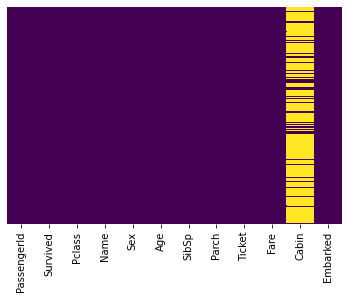

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
# Now we dont have any missing information for Age column

In [ ]:
# In Cabin column's issue there are so many missing values, so we will drop this column here

In [ ]:
train.drop('Cabin',axis=1,inplace=True)
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


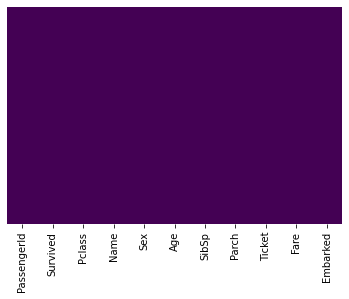

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
# Now there is no missing values in data

In [ ]:
# SECOND STEP OF CLEANING DATA IS CREATING A DUMMY VARIABLE (DEALING WITH CATEGORICAL FEATURES)
# We will need to convert categorical features into dummy variables using Pandas, otherwise our machine learning algorithms won't be able
# to directly take in those features as inputs. eg In Sex column, an ML algorithm is not going to be able to take in just a string of male
# or female. We have to create a new column 0 or 1 for if someone is male or not in order to encode the information in a way that ML algo.
# can understand it, this is known as creating a dummy variable.(In case of City column as well)

In [ ]:
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [ ]:
# Here the issue is, in these two columns one column is predictor of the other(0/1), this issue is called as 'Multicolinearity'
# and it will mess up the algorithm, because a bunch of cols are perfect predictors of other cols, in order to avoid this, will go ahead
# and say drop_first = True 


In [ ]:
pd.get_dummies(train['Sex'],drop_first=True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [ ]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [ ]:
# for Embarked column

In [ ]:
embark = pd.get_dummies(train['Embarked'],drop_first=True) # we've dropped C in the column
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [ ]:
# Here one col is not the perfect predictor of other column as we dropped C.

# To add these new columns to our dataframe, we'll concatinate them

In [ ]:
train = pd.concat([train,sex,embark],axis=1)
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [ ]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [ ]:
# Now the data is numerical, everything is concatenated together and all cols are perfect for ML algorithm.

In [ ]:
train.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,887,0,2,27.0,0,0,13.00,1,0,1
887,888,1,1,19.0,0,0,30.00,0,0,1
888,889,0,3,24.0,1,2,23.45,0,0,1
889,890,1,1,26.0,0,0,30.00,1,0,0
890,891,0,3,32.0,0,0,7.75,1,1,0


In [ ]:
train.drop('PassengerId',axis=1,inplace=True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [ ]:
# WE WILL TRAIN AND USE THE MODEL TO PREDICT THE CLASSES OF WHETHER OR NOT A PASSENGER SURVIVED ON THE TITANIC

In [ ]:
# We have to do the same cleaning process on test data(titanic_test.csv), ii will be our test set.
# Here we will directly use only train set assuming its our whole data 


In [ ]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
# Now we'll actually train and predict by creating a model. For logisic regression, we'll go ahead and grab this from linear model family.
 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = logmodel.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       154
           1       0.78      0.67      0.72       114

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[133,  21],
       [ 38,  76]])